In [1]:
import sys, os
sys.path.append(os.path.realpath(".."))

import util_funcs
from importlib import reload
reload(util_funcs)
from copy import deepcopy as cp

import data_reader as read
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import pywt
import tsfresh.feature_extraction.feature_calculators as feats
import constants
import clinical_text_analysis as cta
reload(cta)
import tsfresh

from os import path

reload(read)
import wf_analysis.datasets as wfdata
import time

In [2]:
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Conv2D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import StandardScaler

Using TensorFlow backend.


In [3]:
edfDatum = read.EdfDataset("train", "01_tcp_ar")[0][0]

In [4]:
constants.SIMPLE_CONV2D_MAP

[[0, 0, 'EEG FP1-REF', 0, 'EEG FP2-REF', 0, 0],
 [0, 'EEG F7-REF', 'EEG F3-REF', 'EEG FZ-REF', 'EEG F4-REF', 'EEG F8-REF', 0],
 ['EEG A1-REF',
  'EEG T3-REF',
  'EEG C3-REF',
  'EEG CZ-REF',
  'EEG C4-REF',
  'EEG T4-REF',
  'EEG A2-REF'],
 [0, 'EEG T5-REF', 'EEG P3-REF', 'EEG PZ-REF', 'EEG P4-REF', 'EEG T6-REF', 0],
 [0, 0, 'EEG O1-REF', 0, 'EEG O2-REF', 0, 0]]

In [19]:
def get_data(split="train", ref="01_tcp_ar", num_process=8s):
    edfData = read.EdfDataset(split, ref, num_)
    mapping = []
    filler = np.array([0 for i in edfDatum.index])
    for row_mapping in constants.SIMPLE_CONV2D_MAP:
        newRowMapping = []
        for sing_channel_mapping in row_mapping:
            if sing_channel_mapping == 0:
                newRowMapping.append(filler)
            else:
                newRowMapping.append(edfDatum[sing_channel_mapping].values)
        mapping.append(newRowMapping)

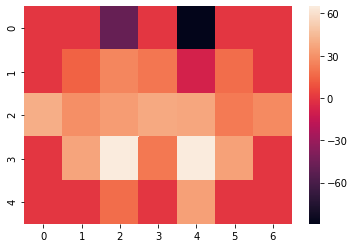

In [74]:
fig = plt.Figure()
fig = heatmap(mapping[:,:,0])

In [78]:
from matplotlib import animation

def init():
      heatmap(mapping[:,:, 0], vmax=.8, square=True)

def animate(i):
    plt.clf()
    data = (mapping[:,:, i])
    heatmap(data, vmax=.8, square=True)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=20, repeat = True)
anim.to_jshtml()

AttributeError: 'AxesSubplot' object has no attribute 'canvas'

In [45]:
import keras_models.vanPutten as vanPutten
from importlib import reload
reload(vanPutten)

<module 'keras_models.vanPutten' from '/home/ms994/dbmi_eeg_clustering/keras_models/vanPutten.py'>

In [92]:
mapping[:,:,0].shape

(5, 7)

In [139]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(filters=3, kernel_size=3, input_shape=(5,7, 1)))
cnn.add(keras.layers.Conv2D(filters=3, kernel_size=3))

In [ ]:
        Conv2D(100, (3,3)),
        Activation('relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(dropout),

        Conv2D(100, (3,3)),
        Activation('relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(dropout),

        Conv2D(300, (2,3)),
        Activation('relu'),
        MaxPool2D(pool_size=(2, 2)),
        Dropout(dropout),

        Conv2D(300, (1,7)),
        Activation('relu'),
        MaxPool2D(pool_size=(1, 2)),
        Dropout(dropout),

        Conv2D(300, (1,3)),
        Conv2D(300, (1,3)),
        Dense(activation='softmax', units=2)

In [140]:

out = cnn.predict(mapping[:,:,0].reshape(1,5,7,1))

In [141]:
out.shape

(1, 1, 3, 3)